<a href="https://colab.research.google.com/github/Femiola914/Breast-cancer-deep-learning-model./blob/main/Breast_cancer_deep_learning_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

** BREAST CANCER PROJECT**

This is a deep learning model programmed with python that be used to triage breast cancer cases into the benign or mak=lignant type, Using the Fine needle aspiration result.  

The data set used is the wisconsin data set that comprises of 569 instances with 30 features each.

The wisconsin data set is picked because it is widely acceptable

The following codes are to import several Python libraries used for data analysis and visualization.

pandas as pd: Imports the Pandas library and aliases it as pd. Pandas is used for data manipulation and analysis.

matplotlib import pyplot as plt: Imports the pyplot module from the Matplotlib library and aliases it as plt. Matplotlib is a plotting library, and pyplot provides a collection of functions to create plots.

seaborn as sns: Imports the Seaborn library, which is built on top of Matplotlib and provides additional statistical plotting capabilities. It is often used for creating more visually appealing plots.

numpy as np: Imports the NumPy library and aliases it as np. NumPy is used for numerical operations and working with arrays.

sklearn.preprocessing import StandardScaler, LabelEncoder:These are preprocessing modules from the scikit-learn library.
StandardScaler is used for standardizing features by removing the mean and scaling to unit variance.
LabelEncoder is used for encoding categorical labels with numerical values.

In [ ]:
import pandas as pd
from matplotlib import pyplot as pit
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder

This code imports the Wisconsin breast cancer Dataset as a CSV file named "data.csv" using Pandas and then prints the transpose of the descriptive statistics of the DataFrame.

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/DATA/data.csv")
print(df.describe().T)

                         count          mean           std          min  \
id                       569.0  3.037183e+07  1.250206e+08  8670.000000   
radius_mean              569.0  1.412729e+01  3.524049e+00     6.981000   
texture_mean             569.0  1.928965e+01  4.301036e+00     9.710000   
perimeter_mean           569.0  9.196903e+01  2.429898e+01    43.790000   
area_mean                569.0  6.548891e+02  3.519141e+02   143.500000   
smoothness_mean          569.0  9.636028e-02  1.406413e-02     0.052630   
compactness_mean         569.0  1.043410e-01  5.281276e-02     0.019380   
concavity_mean           569.0  8.879932e-02  7.971981e-02     0.000000   
concave points_mean      569.0  4.891915e-02  3.880284e-02     0.000000   
symmetry_mean            569.0  1.811619e-01  2.741428e-02     0.106000   
fractal_dimension_mean   569.0  6.279761e-02  7.060363e-03     0.049960   
radius_se                569.0  4.051721e-01  2.773127e-01     0.111500   
texture_se               

This code Drops the null column at index 32 from the DataFrame df.
Then Prints the count of missing values for each column in the DataFrame.

In [ ]:
df = df.drop(df.columns[32], axis=1)
print(df.isnull().sum())


id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64


This code renames the diagnosis column to label the prints the data type

In [ ]:
df = df.rename(columns={'diagnosis':'label'})
print (df.dtypes)

id                           int64
label                       object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

This code is used for preprocessing and visualisation by creating a count plot using the Seaborn library. It visualizes the distribution of the categorical variable 'label' in the DataFrame df. The x-axis represents the categories, and the y-axis represents the count of occurrences for each category. to help the machine understand the provided data.

<Axes: xlabel='label', ylabel='count'>

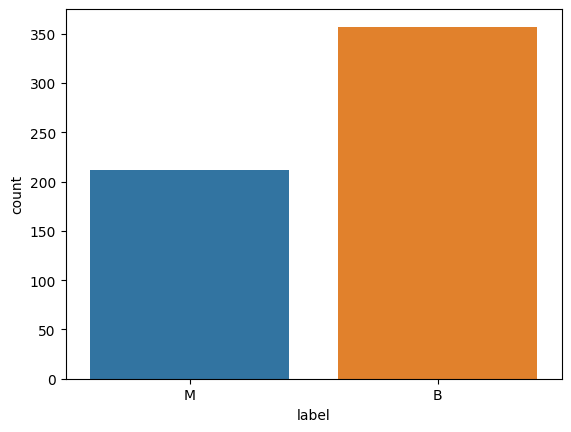

In [ ]:
sns.countplot(x="label", data=df) #M - malignant   B - benign

The primary purpose here is to check the distribution of the original labels, display the unique values before encoding, and then encode the labels ('M' and 'B') into numerical values ('1' and '0') using LabelEncoder.

In [ ]:

print("Distribution of data: ", df['label'].value_counts())

y = df["label"].values
print("diagnosis before encoding are: ", np.unique(y))

from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
Y = labelencoder.fit_transform(y) # M=1 and B=0
print("Labels after encoding are: ", np.unique(Y))

Distribution of data:  B    357
M    212
Name: label, dtype: int64
diagnosis before encoding are:  ['B' 'M']
Labels after encoding are:  [0 1]


Essentially, this code is preparing the feature set (X) for further analysis by excluding the columns "id" and "label" and providing descriptive statistics for the remaining features.

In [ ]:
X = df.drop(labels = ["id" , "label"], axis=1)
print(X.describe().T)




                         count        mean         std         min  \
radius_mean              569.0   14.127292    3.524049    6.981000   
texture_mean             569.0   19.289649    4.301036    9.710000   
perimeter_mean           569.0   91.969033   24.298981   43.790000   
area_mean                569.0  654.889104  351.914129  143.500000   
smoothness_mean          569.0    0.096360    0.014064    0.052630   
compactness_mean         569.0    0.104341    0.052813    0.019380   
concavity_mean           569.0    0.088799    0.079720    0.000000   
concave points_mean      569.0    0.048919    0.038803    0.000000   
symmetry_mean            569.0    0.181162    0.027414    0.106000   
fractal_dimension_mean   569.0    0.062798    0.007060    0.049960   
radius_se                569.0    0.405172    0.277313    0.111500   
texture_se               569.0    1.216853    0.551648    0.360200   
perimeter_se             569.0    2.866059    2.021855    0.757000   
area_se             

Using MinMaxScaler to scale the features in the DataFrame X to a specified range, scaling is often performed to ensure that all features contribute equally to the analysis.

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X)
X = scaler.transform(X)
print(X)  #Scaled values

[[0.52103744 0.0226581  0.54598853 ... 0.91202749 0.59846245 0.41886396]
 [0.64314449 0.27257355 0.61578329 ... 0.63917526 0.23358959 0.22287813]
 [0.60149557 0.3902604  0.59574321 ... 0.83505155 0.40370589 0.21343303]
 ...
 [0.45525108 0.62123774 0.44578813 ... 0.48728522 0.12872068 0.1519087 ]
 [0.64456434 0.66351031 0.66553797 ... 0.91065292 0.49714173 0.45231536]
 [0.03686876 0.50152181 0.02853984 ... 0.         0.25744136 0.10068215]]


 This code is used to split the data into training and testing sets to evaluate the model's performance on unseen data, In this case 25% of the data is dedicated to the testing data. The random_state parameter ensures reproducibility, meaning that if you run the code again with the same random state, you will get the same split.

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=42)
print("Shape of training data is: ", X_train.shape)
print("Shape of testing data is: ", X_test.shape)

Shape of training data is:  (426, 30)
Shape of testing data is:  (143, 30)


This code is used to import sequential, dense, activation and dropout which are components used to define and configure the architecture of a neural network in Keras.

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout

Input Layer (Dense with 16 neurons and 'relu' activation):
Dense(16, input_dim=30, activation='relu')
This layer has 16 neurons, input_dim=30 specifies that the input to this layer has 30 features and uses the ReLU (Rectified Linear Unit) activation function.

Dropout Layer (Dropout with a rate of 0.2):
Dropout(0.2)
This layer introduces dropout with a rate of 0.2, meaning that randomly selected neurons will be set to 0 during training with a probability of 20%.

Output Layer (Dense with 1 neuron and 'sigmoid' activation):
Dense(1)-This is the output layer with 1 neuron.
The Activation('sigmoid') applies the sigmoid activation function to squash the output between 0 and 1, which is suitable for binary classification problems.

Model Compilation (model.compile):
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
The model is compiled with binary cross-entropy as the loss function, the Adam optimizer, and accuracy as the evaluation metric.
Summary (print(model.summary())):

Prints to show a summary of the model architecture, showing the type and shape of each layer, as well as the total number of parameters.

In [ ]:
model = Sequential()
model.add(Dense(16, input_dim=30, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 16)                496       
                                                                 
 dropout_1 (Dropout)         (None, 16)                0         
                                                                 
 dense_3 (Dense)             (None, 1)                 17        
                                                                 
 activation_1 (Activation)   (None, 1)                 0         
                                                                 
Total params: 513 (2.00 KB)
Trainable params: 513 (2.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


THis line of code is training the neural network model using the training data (X_train, y_train) for a specified number of epochs (100 in this case), with a batch size of 64. The validation data (X_test, y_test) is used to evaluate the model's performance after each epoch.

In [ ]:
history = model.fit(X_train, y_train, verbose=1, epochs=100, batch_size=64, validation_data=(X_test, y_test))

Epoch 1/100
7/7 [==============================] - 1s 31ms/step - loss: 0.6783 - accuracy: 0.6009 - val_loss: 0.6579 - val_accuracy: 0.7273
Epoch 2/100
7/7 [==============================] - 0s 8ms/step - loss: 0.6626 - accuracy: 0.6385 - val_loss: 0.6427 - val_accuracy: 0.7832
Epoch 3/100
7/7 [==============================] - 0s 8ms/step - loss: 0.6542 - accuracy: 0.6808 - val_loss: 0.6257 - val_accuracy: 0.7902
Epoch 4/100
7/7 [==============================] - 0s 8ms/step - loss: 0.6354 - accuracy: 0.7230 - val_loss: 0.6081 - val_accuracy: 0.7972
Epoch 5/100
7/7 [==============================] - 0s 10ms/step - loss: 0.6231 - accuracy: 0.7277 - val_loss: 0.5926 - val_accuracy: 0.7972
Epoch 6/100
7/7 [==============================] - 0s 8ms/step - loss: 0.6039 - accuracy: 0.7676 - val_loss: 0.5784 - val_accuracy: 0.8112
Epoch 7/100
7/7 [==============================] - 0s 11ms/step - loss: 0.5958 - accuracy: 0.7723 - val_loss: 0.5646 - val_accuracy: 0.8322
Epoch 8/100
7/7 [=======

This code is used to plot the training and validation loss, as well as training and validation accuracy over epochs. It helps visualize the performance of your model during the training process.

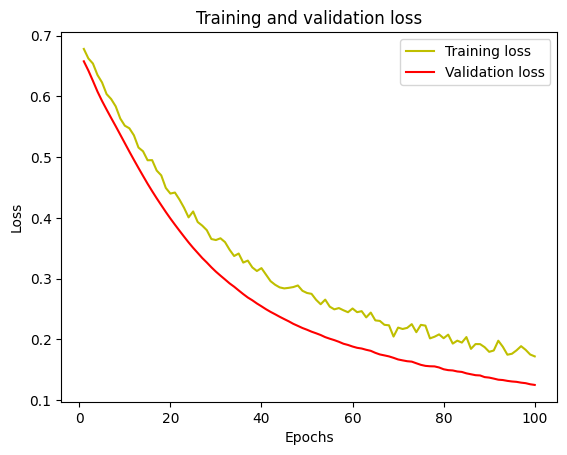

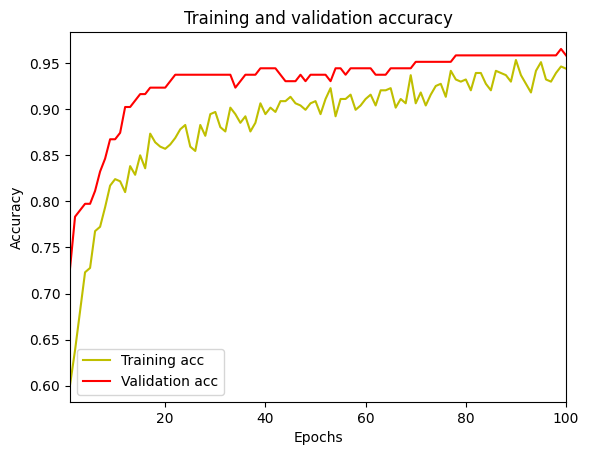

In [ ]:
import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt .plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

acc = history.history['accuracy']  #Use accuracy if acc doesn't work
val_acc = history.history['val_accuracy']  #Use val_accuracy if acc doesn't work
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.xlim(1, 100)
plt.show()


The first set of code is for making predictions on the test set (X_test) using the trained model. The threshold for binary classification is set at 0.5, meaning if the predicted probability is greater than 0.5, the corresponding instance is classified as positive; otherwise, it is classified as negative.  

The Other set of code is used to make a confusion Matrix with heatmap to show the accuracy of the model.

5/5 [==============================] - 0s 4ms/step


<Axes: >

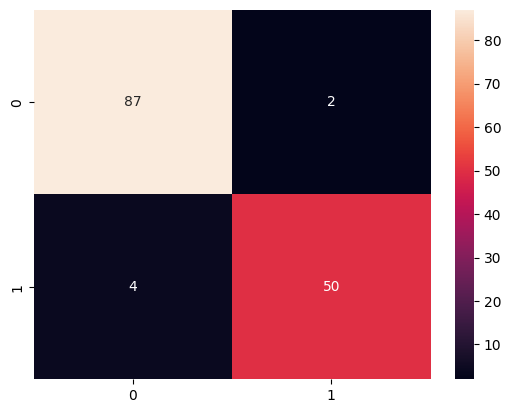

In [ ]:

y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)


from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True)